# Spline Fitting

Dazhi W @ 2019

Adapted from http://web.stanford.edu/class/stats202/content/lab2.Rmd

In [40]:
library(ggplot2)
library(splines)
set.seed(1)

In [41]:
f = function(x) {
    x ^ 2 - 0.2 * x ^ 2.3333
}

In [42]:
d = data.frame(x = seq(0, 100, 0.1))
d$f = f(d$x)
s = data.frame(x = c(3, 10, 80, 70, 65, 43, 90, 40, 32, 15, 98))
means = f(s$x)
s$f1 = rnorm(n = length(s$x), mean = means, sd = rep(250, length(s$x)))
s$f2 = rnorm(n = length(s$x), mean = means, sd = rep(250, length(s$x)))
s$f3 = rnorm(n = length(s$x), mean = means, sd = rep(250, length(s$x)))
s$f4 = rnorm(n = length(s$x), mean = means, sd = rep(250, length(s$x)))
lims = scale_y_continuous(limits = c(-500, 1300), name = "f(x)")

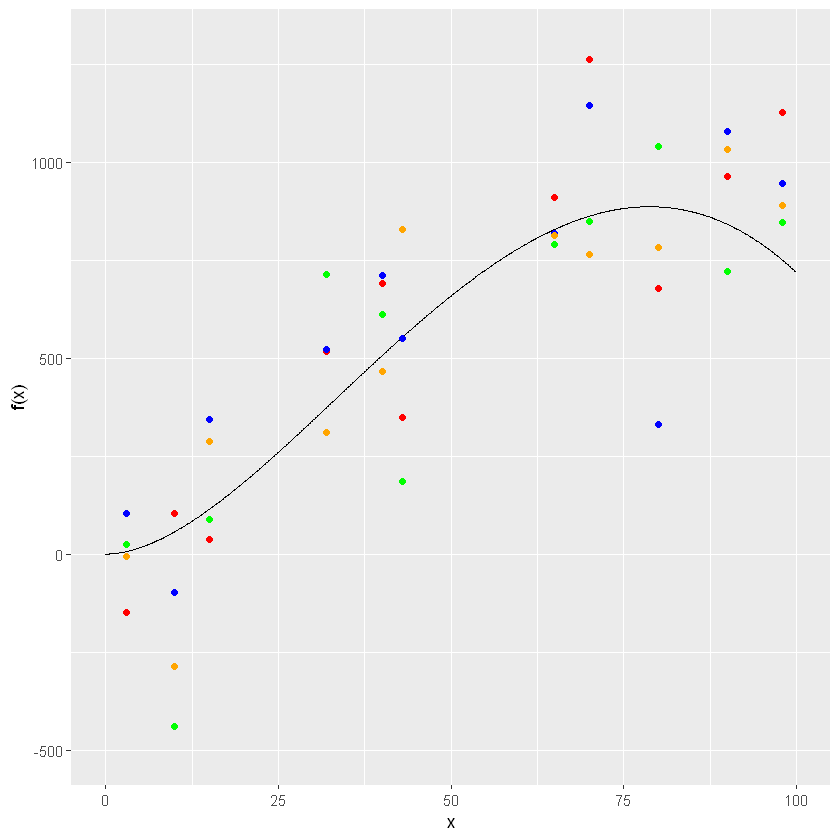

In [43]:
ggplot(d, aes(x = x, y = f)) + geom_line()  + lims + 
    geom_point(data = s, aes(x = x, y = f1), color = "red") + 
    geom_point(data = s, aes(x = x, y = f2), color = "blue") + 
    geom_point(data = s, aes(x = x, y = f3), color = "green") + 
    geom_point(data = s, aes(x = x, y = f4), color = "orange")

In [44]:
fit = lm(f1 ~ bs(x, df = 5), data = s)
d$f1 = predict(fit, list(x = d$x))

fit = lm(f2 ~ bs(x, df = 5), data = s)
d$f2 = predict(fit, list(x = d$x))

fit = lm(f3 ~ bs(x, df = 5), data = s)
d$f3 = predict(fit, list(x = d$x))

fit = lm(f4 ~ bs(x, df = 5), data = s)
d$f4 = predict(fit, list(x = d$x))


Warning message in bs(x, degree = 3L, knots = c(`33.33333%` = 34.6666666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(x, degree = 3L, knots = c(`33.33333%` = 34.6666666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(x, degree = 3L, knots = c(`33.33333%` = 34.6666666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(x, degree = 3L, knots = c(`33.33333%` = 34.6666666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

mapping: x = ~x, y = ~f4 
geom_line: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

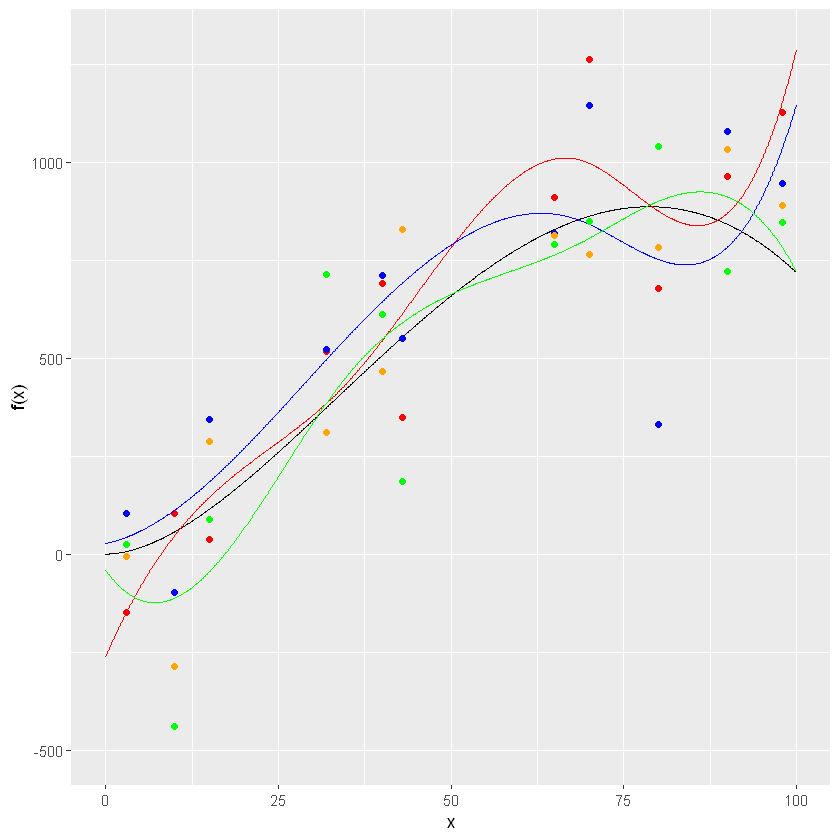

In [45]:
ggplot(d, aes(x = x, y = f)) + geom_line()  + lims + 
    geom_point(data = s, aes(x = x, y = f1), color = "red") + 
    geom_line(data = d, aes(x = x, y = f1), color = "red") +
    geom_point(data = s, aes(x = x, y = f2), color = "blue") +
    geom_line(data = d, aes(x = x, y = f2), color = "blue") +
    geom_point(data = s, aes(x = x, y = f3), color = "green") + 
    geom_line(data = d, aes(x = x, y = f3), color = "green") + 
    geom_point(data = s, aes(x = x, y = f4), color = "orange")
    geom_line(data = d, aes(x = x, y = f4), color = "orange")